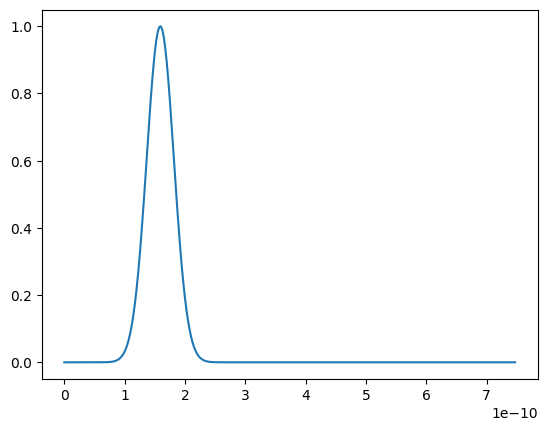

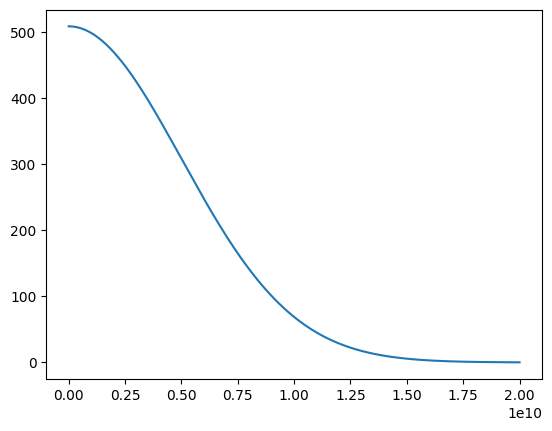

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import speed_of_light as c
from matplotlib.animation import FuncAnimation

def Gaussian_source(t, f_max, A): 
    tau = 1/(np.pi*f_max)
    t_0 = 5*tau
    y = A*np.exp(-((t-t_0)/tau)**2)
    return y

Nz = 200
N_time_steps = 300

f_max = 10e9
z_source = int(Nz/2)

n_freq = 1000
frequencies = np.linspace(0, 2*f_max, n_freq)

smallest_feature_dimension = 1e-2
eps_yy = np.ones(Nz)
mu_xx = np.ones(Nz)

n = np.sqrt(mu_xx*eps_yy)

N_lam = 20
N_dim = 4
lambda_min = c/(f_max*np.max(n))
z_step = np.min([lambda_min/N_lam, smallest_feature_dimension/N_dim])
z_step = lambda_min/N_lam
z_axis = np.arange(0, z_step*Nz, z_step)

time_step = n[0]*z_step/(2*c)

mEy = c*time_step/(eps_yy*z_step)
mHx = c*time_step/(mu_xx*z_step)

time_array = np.arange(0, time_step*N_time_steps, time_step)

A = 1
g = Gaussian_source(time_array, f_max, A)

plt.plot(time_array, g)
plt.show()

K = np.exp(-1j*2*np.pi*time_step*frequencies)
source_spectrum = np.zeros(n_freq, dtype = "complex")

for i in range(N_time_steps):
    source_spectrum += (K**i)*g[i]

plt.plot(frequencies, np.abs(source_spectrum)**2)
plt.show()